# Classificação

In [1]:
import functools
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as sct
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_blobs, make_classification
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

Using TensorFlow backend.


In [2]:
np.random.seed(1000)

In [3]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Predict
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, #clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)


## SMOTE (Synthetic Minority Oversampling Technique)

#### Que função linda, dá para realmente gerar dados, alterando diversos parâmetros


In [4]:
X_data, y_data = make_classification(n_samples = 1000,
                                    n_features = 10,
                                    n_informative = 10, n_redundant = 0,
                                    n_classes = 2,
                                    n_repeated = 0,
                                    weights = (0.1,0.9),
                                    n_clusters_per_class = 1,
                                    class_sep = 3.0)

Sempre quis achar uma maneira de nomear as colunas facilmente com Xi

In [5]:
np.c_[X_data, y_data].shape

(1000, 11)

In [6]:
imbalanced = pd.DataFrame(np.c_[X_data, y_data], columns = ['X' + str(i) for i in range(1,11)] + ['Target'])

In [7]:
imbalanced.iloc[:5, :-1]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,2.264019,-5.879977,-0.262661,1.137353,-1.635105,-2.531767,5.789418,-0.951279,2.643438,-0.831458
1,1.829764,-5.209499,2.999197,2.290076,-3.010978,-4.402686,0.908426,-3.332957,3.722355,0.615578
2,1.350631,-5.069955,3.869841,2.523473,-4.199743,-6.161144,0.800673,-1.716646,5.273588,2.746047
3,0.897472,-4.894522,1.861834,3.581587,-2.396599,-6.604574,2.122387,-2.099819,1.930993,1.464681
4,2.399397,-1.858286,5.391069,3.715560,-4.269411,-4.255609,0.762214,-3.168513,6.155921,4.429450


In [8]:
imbalanced.Target.value_counts()

1.0    894
0.0    106
Name: Target, dtype: int64

### Visualizar dados em $\mathbb{R}^{10}$ através de PCA

In [9]:
pca = PCA(n_components=2)

pca.fit(imbalanced.drop(['Target'], axis = 1)), #axis = 1, columnwise operation

imbalanced_pca = pca.transform(imbalanced.drop(['Target'], axis = 1))

Dados reduzidos para segunda dimensão 

In [10]:
imbalanced_pca.shape

(1000, 2)

In [11]:
pca.explained_variance_ratio_

array([0.46296561, 0.13935391])

### Importante notar que esta representação só representa 50 % da variância dos dados, não é tão fiel assim aos dados originais 

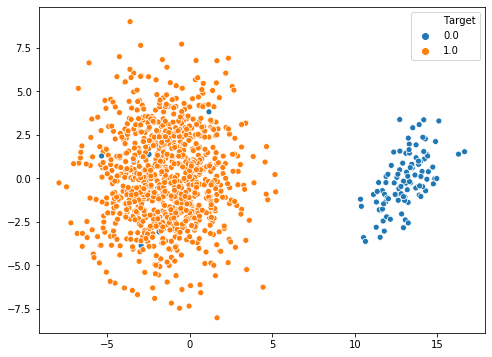

In [12]:
plt.subplots(figsize = (8,6))
sns.scatterplot(x = imbalanced_pca[:,0],
                y = imbalanced_pca[:,1],
                hue = imbalanced.Target)

## Reamostrar o dataset com SMOTE da biblioteca imblearn

In [13]:
smote = SMOTE("minority") #Para a classe minoritária?

X_smote, y_smote = smote.fit_resample(X = imbalanced.iloc[:,:-1], y = imbalanced.Target)

In [14]:
sum(y_smote == True)/sum(y_smote == False)

1.0

### O novo dataframe com os dados balanceados

In [15]:
balanced = pd.DataFrame(np.c_[X_smote, y_smote], columns = ['X' + str(i) for i in range(1,11)] + ['Target'])

### Visualização em $\mathbb{R}^{2}$ dos dados, agora balanceados

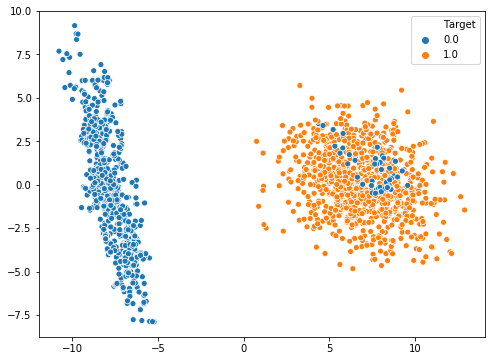

In [16]:
plt.subplots(figsize = (8,6))

pca.fit(balanced.drop(['Target'], axis = 1))
balanced_pca = pca.transform(balanced.drop(['Target'], axis = 1))

sns.scatterplot(balanced_pca[:,0], balanced_pca[:,1], hue = balanced.Target)

In [17]:
balanced.Target.value_counts()

0.0    894
1.0    894
Name: Target, dtype: int64

# Criando datasets para classificação

In [18]:
X, y = make_blobs(n_samples=500, centers = 3, cluster_std = 2)

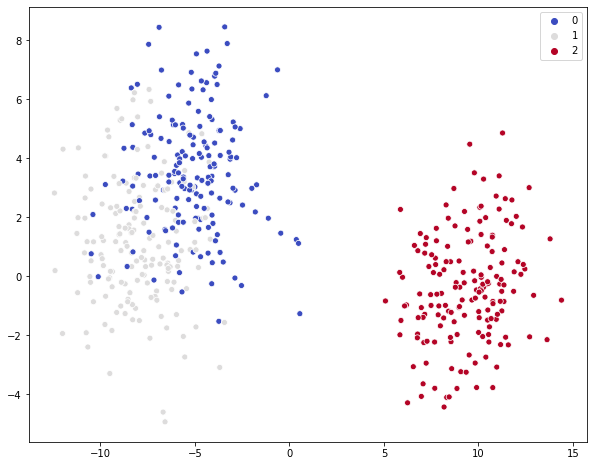

In [19]:
plt.subplots(figsize = (10,8))
sns.scatterplot(X[:,0], X[:,1], hue = y, palette = 'coolwarm')

### Train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Regressão Logística

In [21]:
logistic = LogisticRegression()

logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
(X.shape, y.shape)

((500, 2), (500,))

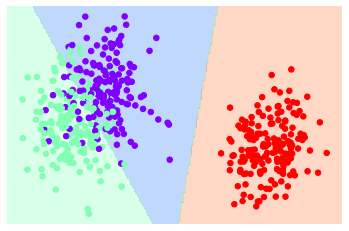

In [23]:
visualize_classifier(logistic, X, y)

Predição com probabilidades

In [24]:
logistic.predict_proba([[-3,-2]])

array([[0.58836267, 0.41100477, 0.00063257]])

In [25]:
logistic.predict([[-3,-2]])

array([0])

# KNN (K-Nearest Neighbours - K Vizinhos mais Próximos)
# Método Não Paramétrico

In [26]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

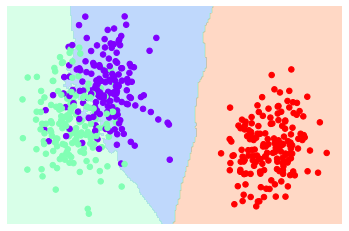

In [27]:
visualize_classifier(knn, X, y)

# Árvore de decisão

In [28]:
decision_tree = DecisionTreeClassifier(max_depth=2)

decision_tree_fitted = decision_tree.fit(X_train, y_train)

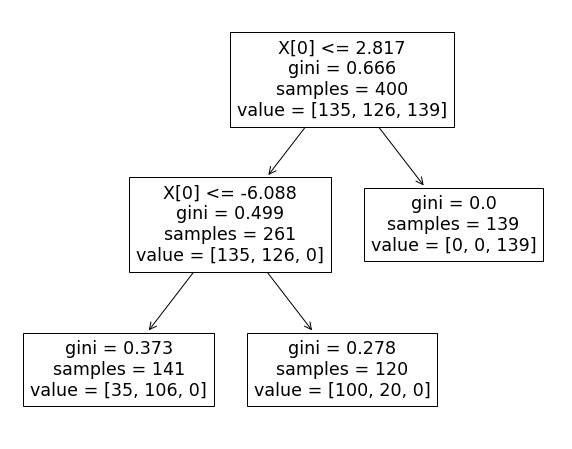

In [29]:
plt.subplots(figsize = (10,8))
plot_tree(decision_tree_fitted);

# Bagging

Árvores de decisão possuem alta variância e baixo viés. Possuem tendência de gerar overfitting. 

## Bootstraping para diminuir a variância

Treinar um modelo para cada uma das reamostragens do conjunto de treinamento. 

O Bootstrapping é uma técnica de reamostragem com reposição, ou seja, o algoritmo seleciona porções do dataset original n vezes, e nestas n vezes, há algumas vezes em que uma amostra i aparecerá em mais de um dataset de treinamento, que é um subset do original

In [43]:
bagging = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=300,
                           max_samples=100,
                           bootstrap = True)

In [44]:
bagging.fit(X, y);

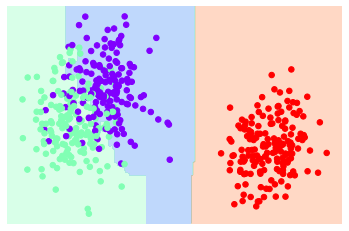

In [45]:
visualize_classifier(bagging, X, y)

### Houve um tradeoff entre interpretabilidade e desempenho, dado que uma árvore é fácil de interpretar, mas várias árvores não 

# Random Forest

No RandomForest, além do split das observações, ou seja, do conjunto de linhas, também há splits nas variáveis, na tentativa de obter variáveis menos correlacionadas. Faz-se então um bootstrap em amostras e em variáveis?

In [46]:
random_forest = RandomForestClassifier(n_estimators=500)

random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

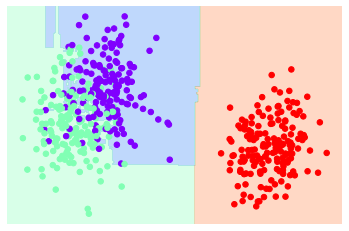

In [47]:
visualize_classifier(random_forest, X, y)